In [80]:
"""Name: Yijun Chen; UoBNo:lm20306; imdb film analysis"""


import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

### Scrape data from imdb

In [58]:
titles = [] # store the movie titles
years = []  # release year
ratings = []  # rating of movie
metascores = []  # meta score
certificates = []
votings = []
for i in range(1, 200, 50):
  #loop for each page
  res = requests.get("https://www.imdb.com/search/title/?genres=drama&groups=top_250&sort=user_rating,desc&start={}&ref_=adv_nxt".format(i))
  content = res.content
  soup = BeautifulSoup(content)
  div = soup.find("div", {"class":"lister-list"}) # find movie list
  print(i)
  divs = div.find_all("div", {"class":"lister-item mode-advanced"})
  for div in divs:
    title = div.find("h3").find("a").string # extract the title
    titles.append(title)
    year = div.find("h3").find("span", {"class":"lister-item-year"}).string  # extract the release year
    year = year.replace("(", "")  # remove bracket
    year = year.replace(")", "")
    years.append(year)
    rating = div.find("div", {"class":"ratings-bar"}).find("strong").string # extract movie rating
    ratings.append(float(rating))
    span = div.find("span", {"class": "metascore"})
    # no metascore find
    if span is None:
      metascores.append(None)
    else:
      metascores.append(float(span.string))
    certificate = div.find("span", {"class":"certificate"})
    # no certificate find
    if certificate is None:
      certificate =  None
    else:
      certificate = certificate.string
    certificates.append(certificate)
    p = div.find("p", {"class":"sort-num_votes-visible"})
    nv = p.find("span", {"name":"nv"}).string # extract the voting
    nv = nv.replace(",", "")
    nv = int(nv)
    votings.append(nv)

1
51
101
151


### Data Cleaning

Create data frame.

In [59]:
movies  = pd.DataFrame({
    "title": titles,
    "year": years,
    "metascore":metascores,
    "rating": ratings,
    "certificate": certificates,
    "voting": votings
})

In [60]:
movies.head()

,title,year,metascore,rating,certificate,voting
0,The Shawshank Redemption,1994,80.0,9.3,R,2321147
1,The Godfather,1972,100.0,9.2,R,1603119
2,The Dark Knight,2008,84.0,9.0,PG-13,2283167
3,The Godfather: Part II,1974,90.0,9.0,R,1119579
4,12 Angry Men,1957,96.0,9.0,Approved,683089


In [25]:
movies.to_csv("data.csv")

In [32]:
movies = pd.read_csv("data.csv", index_col=0)

In [33]:
movies.shape

(186, 6)

There are 187 observations and 6 variables.

In [34]:
movies.describe()

,year,metascore,rating,voting
count,186.00000,154.000000,186.000000,1.860000e+02
mean,1987.72043,82.844156,8.307527,4.940869e+05
std,25.23848,10.672259,0.235836,4.710229e+05
min,1921.00000,57.000000,8.000000,2.546400e+04
25%,1971.00000,76.000000,8.100000,1.413720e+05
50%,1995.00000,85.000000,8.200000,3.243555e+05
75%,2008.00000,90.750000,8.400000,7.315742e+05
max,2020.00000,100.000000,9.300000,2.321536e+06


The average rating is 8.3, the maximum rating is 9.3, the minimum rating is 8, maximum voting is 2321536, the minimum voting is 2.546400. The mean voting is 4940869.

### Data Analysis

**1. Which movies has the highest voting? What are the top 10 movies with the highest votings**

In [35]:
movies.sort_values("voting", ascending=False).head(10)

,title,year,metascore,rating,certificate,voting
0,The Shawshank Redemption,1994,80.0,9.3,12,2321536
2,The Dark Knight,2008,84.0,9.0,16,2283530
8,Fight Club,1999,66.0,8.8,16,1838890
6,Pulp Fiction,1994,94.0,8.9,16,1810946
10,Forrest Gump,1994,82.0,8.8,12,1790588
9,The Lord of the Rings: The Fellowship of the Ring,2001,92.0,8.8,12,1645982
5,The Lord of the Rings: The Return of the King,2003,94.0,8.9,12,1629495
1,The Godfather,1972,100.0,9.2,16,1603427
16,Interstellar,2014,74.0,8.6,12,1491842
11,The Lord of the Rings: The Two Towers,2002,87.0,8.7,12,1473124


As we can see from the result, The Shawshank Redemption has the highest voting.

**2.What is the number of moveis by each certificate? which cerfificate has the largest number of movies?**

Text(0, 0.5, 'Count')

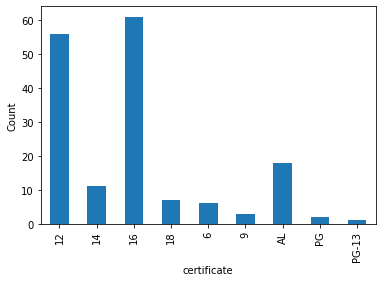

In [30]:
movies.groupby("certificate").count()["title"].plot(kind="bar")
plt.ylabel("Count")

The R has the largest number of movies.

**3.What is the relationship between the rating and voting number? Are they positive associated**

Text(0, 0.5, 'Rating')

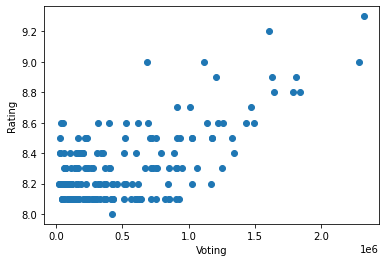

In [36]:
plt.scatter(movies["voting"], movies["rating"])
plt.xlabel("Voting")
plt.ylabel("Rating")

We can see a positive linear association between the voting and rating.

**4.Which year produces the largest number of movies?**

<AxesSubplot:xlabel='year'>

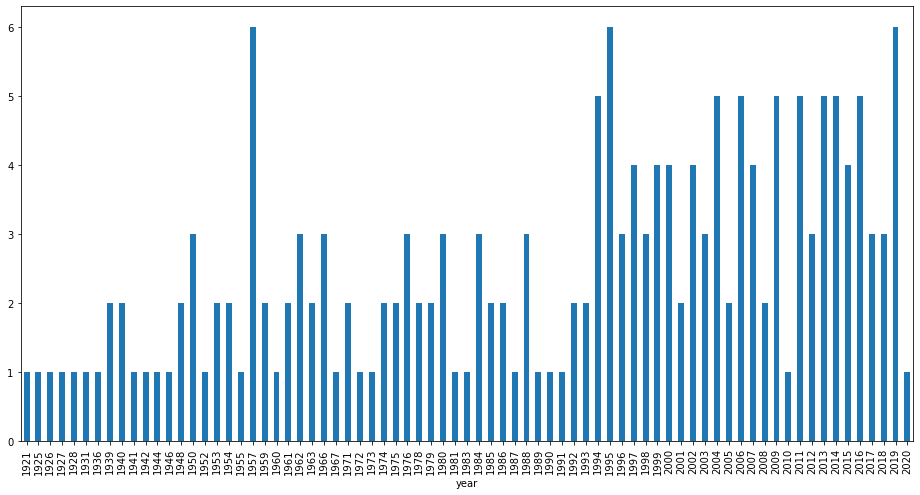

In [45]:
movies.groupby("year").count()["title"].plot(kind="bar", figsize=(16,8))

As we can see from the plot, in year 1957, 1995, 2019, they have the largest number of movies.

**5.What's the average rating of the  movies for each certificate? Is there any difference for difference certificate?**

<AxesSubplot:xlabel='certificate'>

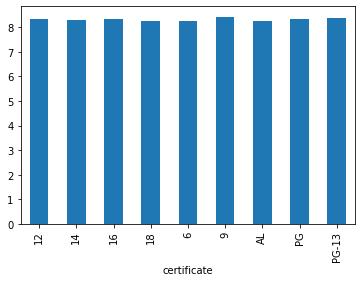

In [51]:
movies.groupby("certificate").mean()["rating"].plot(kind="bar")

The average rating of the movies are quite similar for different certificate.

### Conclusion

Based on the computation and visualiztion, we can find that The Shawshank Redemption has the largest number of votings, and the certificate R has the largest number of movies, the rating is positive linear associated with the voting number.